<a href="https://colab.research.google.com/github/adityayadav4507/100Days_of_ML/blob/main/65_Day_Random_Forest_v_s_Bagging.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

from sklearn.ensemble import RandomForestClassifier , BaggingClassifier

In [64]:
X,y = make_classification(n_samples=100, n_features=5, n_informative=5 , n_clusters_per_class=1,n_redundant=0, random_state=42)

In [65]:
df= pd.DataFrame(X,columns=['col1','col2','col3','col4','col5'])
df['target']=y
df.head()

,col1,col2,col3,col4,col5,target
0,1.053909,-3.861208,1.530963,0.596692,1.030284,0
1,3.243492,1.666651,3.179016,-0.825861,0.778528,1
2,0.712446,-1.201617,1.528624,-0.422788,-0.376825,0
3,1.388329,1.538995,1.243716,0.740905,-2.081063,1
4,2.394647,-3.576345,0.914217,0.363136,2.110329,0


In [66]:
X_train,X_test,y_train,y_test = train_test_split(df.iloc[:,:-1],df.iloc[:,-1],test_size=0.4,random_state=42)
X_train.sample(2)

,col1,col2,col3,col4,col5
52,-0.980984,1.337831,3.260420,2.028970,-2.302635
98,3.238631,2.680206,3.410894,-0.817508,-0.665564


In [67]:
bag=BaggingClassifier(max_features=2)
bag.fit(X_train,y_train)

BaggingClassifier(max_features=2)

[Text(0.4230769230769231, 0.9, 'x[0] <= -0.202\ngini = 0.5\nsamples = 41\nvalue = [30, 30]'),
 Text(0.15384615384615385, 0.7, 'x[1] <= 1.427\ngini = 0.069\nsamples = 17\nvalue = [27, 1]'),
 Text(0.28846153846153844, 0.8, 'True  '),
 Text(0.07692307692307693, 0.5, 'gini = 0.0\nsamples = 12\nvalue = [20, 0]'),
 Text(0.23076923076923078, 0.5, 'x[1] <= 1.75\ngini = 0.219\nsamples = 5\nvalue = [7, 1]'),
 Text(0.15384615384615385, 0.3, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.3076923076923077, 0.3, 'gini = 0.0\nsamples = 4\nvalue = [7, 0]'),
 Text(0.6923076923076923, 0.7, 'x[1] <= 2.602\ngini = 0.17\nsamples = 24\nvalue = [3, 29]'),
 Text(0.5576923076923077, 0.8, '  False'),
 Text(0.5384615384615384, 0.5, 'x[0] <= 1.858\ngini = 0.069\nsamples = 22\nvalue = [1, 27]'),
 Text(0.46153846153846156, 0.3, 'gini = 0.0\nsamples = 16\nvalue = [0, 20]'),
 Text(0.6153846153846154, 0.3, 'x[0] <= 2.276\ngini = 0.219\nsamples = 6\nvalue = [1, 7]'),
 Text(0.5384615384615384, 0.1, 'gini = 0.0\nsam

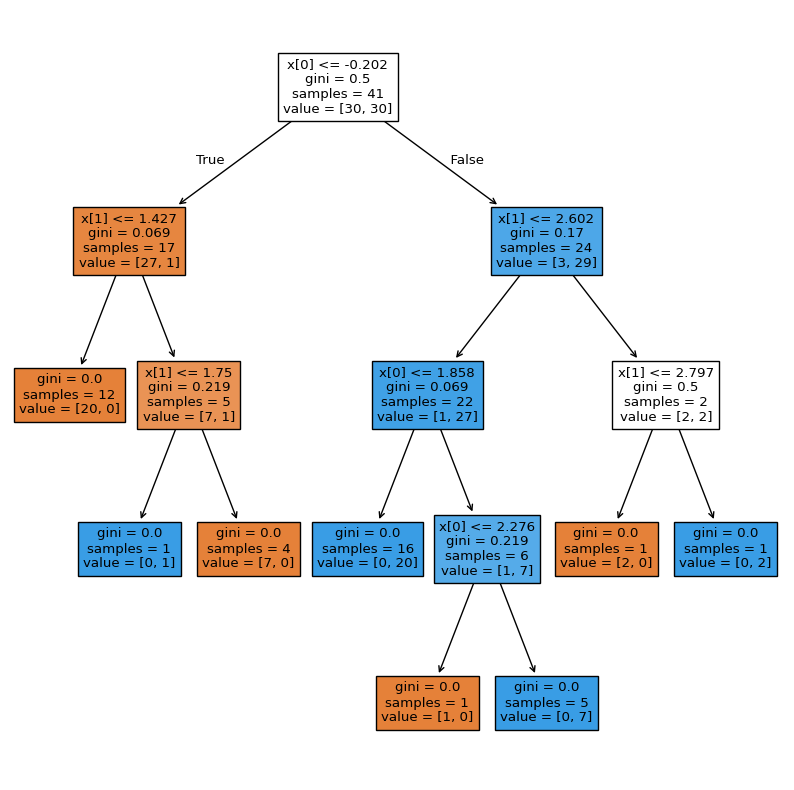

In [68]:
plt.figure(figsize=(10,10))
from sklearn.tree import plot_tree
plot_tree(bag.estimators_[0],filled=True)

# Random Forest

In [69]:
rf = RandomForestClassifier(max_features=2) # column sampling with 2 column
rf.fit(X_train,y_train)

RandomForestClassifier(max_features=2)

[Text(0.4444444444444444, 0.9, 'x[4] <= -0.472\ngini = 0.486\nsamples = 40\nvalue = [25, 35]'),
 Text(0.2222222222222222, 0.7, 'x[1] <= -2.006\ngini = 0.074\nsamples = 17\nvalue = [1, 25]'),
 Text(0.3333333333333333, 0.8, 'True  '),
 Text(0.1111111111111111, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.3333333333333333, 0.5, 'gini = 0.0\nsamples = 16\nvalue = [0, 25]'),
 Text(0.6666666666666666, 0.7, 'x[1] <= 0.721\ngini = 0.415\nsamples = 23\nvalue = [24, 10]'),
 Text(0.5555555555555556, 0.8, '  False'),
 Text(0.5555555555555556, 0.5, 'gini = 0.0\nsamples = 15\nvalue = [23, 0]'),
 Text(0.7777777777777778, 0.5, 'x[0] <= 1.839\ngini = 0.165\nsamples = 8\nvalue = [1, 10]'),
 Text(0.6666666666666666, 0.3, 'x[3] <= 1.596\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.5555555555555556, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.7777777777777778, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.8888888888888888, 0.3, 'gini = 0.0\nsamples = 4\nvalue = 

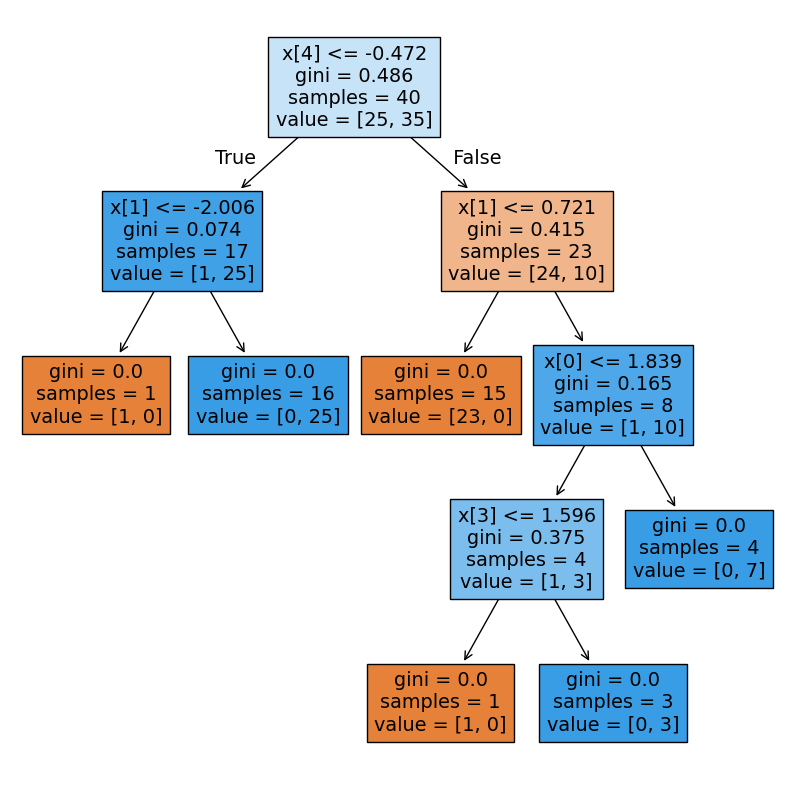

In [70]:
plt.figure(figsize=(10,10))
from sklearn.tree import plot_tree
plot_tree(rf.estimators_[0],filled=True) # node sampling

In [71]:
bag.predict(df.iloc[:1,:-1])

array([0])

In [72]:
rf.predict(df.iloc[:1,:-1])

array([0])

In [73]:
bag_pred=bag.predict(X_test)
rf_pred=rf.predict(X_test)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,bag_pred))
print(accuracy_score(y_test,rf_pred)) # rf have node sampling and it create more randomness

0.825
0.975
